# Analysis and Results Visualization

This script describes the procedure to request an analysis to the Viking Analytics Vibration service.
It shows how to query for results of single-asset or asset-population analysis.
In addition, it presents some examples of how to visualize the results available for the mode identification feature.

## Preliminaries

This procedure describes all the steps to request an analysis, get analysis results and plot those results using the functions in `plotting`.
Local visualizations functions to create the figures are imported from `plotting`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from requests import HTTPError

# import mvg library with python bindings to mvg-API
from mvg import MVG, plotting

Note that the `TOKEN` is used both for authorization and authentication. Thus, each unique token represents a unique user and each user has their own unique database on the VA vibration service.

**You need to insert your token received from Viking Analytics here:

In [38]:
# Replace by your own Token
VALID_TOKEN = "Add token here"

Instantiate a session object with mvg library.
A session object basically caches the endpoint and the token, to simplify the the calls to the mvg library.

In [3]:
ENDPOINT = "https://api.beta.multiviz.com"
session = MVG(ENDPOINT, VALID_TOKEN)

## Asset Analysis

In this example, we will use the sources uploaded by the ["Sources and Measurement"](sources_and_measurements.ipynb) example.
We start by seeing if the sources are available in the database.
At least, sources, "u0001" and "u0005", should appear as available.

In [4]:
sources = session.list_sources()

print("Retrieved sources")
for src in sources:
    print(src)
    s_info = session.get_source(src['source_id'])
    print(f"Source info retrieved for one source: {s_info}")

Retrieved sources
{'source_id': 'u0001', 'meta': {'assetId': 'assetA', 'measPoint': 'mloc01', 'location': 'paris', 'updated': 'YES! I have been updated'}}
Source info retrieved for one source: {'source_id': 'u0001', 'meta': {'assetId': 'assetA', 'measPoint': 'mloc01', 'location': 'paris', 'updated': 'YES! I have been updated'}}
{'source_id': 'u0002', 'meta': {'assetId': 'assetB', 'measPoint': 'mloc01', 'location': 'paris'}}
Source info retrieved for one source: {'source_id': 'u0002', 'meta': {'assetId': 'assetB', 'measPoint': 'mloc01', 'location': 'paris'}}
{'source_id': 'u0003', 'meta': {'assetId': 'assetC', 'measPoint': 'mloc01', 'location': 'milano'}}
Source info retrieved for one source: {'source_id': 'u0003', 'meta': {'assetId': 'assetC', 'measPoint': 'mloc01', 'location': 'milano'}}
{'source_id': 'u0004', 'meta': {'assetId': 'assetD', 'measPoint': 'mloc01', 'location': 'milano'}}
Source info retrieved for one source: {'source_id': 'u0004', 'meta': {'assetId': 'assetD', 'measPoint

During our example, we will utilize sources, "u0001" and "u0005", previously uploaded to our database.

In [5]:
SOURCE_IDS = ["u0001", "u0005"]
SOURCE_IDS

['u0001', 'u0005']

The Viking Analytics Vibration service has several features available.
We list the available features along with the version of each of them in the following way:

In [6]:
available_features = session.supported_features()
available_features

{'RMS': '0.0.1', 'ModeId': '0.1.0', 'BlackSheep': '0.1.0'}

Once the source and measurements had been uploaded in the database, we can request an analysis to the VA Vibration service.
When we request an analysis, we need to say the source to be used in the analysis and the feature to be applied.

The requested analysis will return a dictionary object with two elements.
The first element is a `"request_id"` that can be used to retrieve the results after.
The second element is `"request_status"` that provides the status right after placing the analysis request. 

Here, we will request the "RMS" feature from our source "u0001".

In [7]:
SOURCE_ID = SOURCE_IDS[0]
RMS_u0001 = session.request_analysis(SOURCE_ID, 'RMS')
RMS_u0001 

{'request_id': 'de9562802a3248a9723ce4a8950c9a00', 'request_status': 'ongoing'}

Now, we proceed to request the "ModeId" feature for the same source.

In [8]:
ModeId_u0001 = session.request_analysis(SOURCE_ID, 'ModeId')
ModeId_u0001 

{'request_id': '9cced936d101c436eb32e7f8dc379796', 'request_status': 'ongoing'}

Before we are able to get the analysis results, we need to wait until those results are successfully completed.

We can query for the status of our requested analysis.
The possible status are:
- Queued: The analysis has not started in the remote server and it is in the queue to begin.
- Ongoing: The analysis is been processed at this time.
- Failed: The analysis is complete and failed to produce a result.
- Successful: The analysis is complete and it successfully produced a result.

In [10]:
REQUEST_IDS_u0001 = [RMS_u0001['request_id'], ModeId_u0001['request_id']]
status = session.get_analysis_status(REQUEST_IDS_u0001[0])
print(f"RMS Analysis: {status}")
status = session.get_analysis_status(REQUEST_IDS_u0001[1])
print(f"ModeId Analysis: {status}")

RMS Analysis: successful
ModeId Analysis: successful


The similar procedure is repeated to request the "RMS" and "ModeId" for our source "u0005".

In [11]:
SOURCE_ID = SOURCE_IDS[1]
RMS_u0005 = session.request_analysis(SOURCE_ID, 'RMS')
RMS_u0005

{'request_id': '9b0673ec9ee86fd9069cd33b4f917a4a', 'request_status': 'ongoing'}

In [12]:
SOURCE_ID = SOURCE_IDS[1]
ModeId_u0005 = session.request_analysis(SOURCE_ID, 'ModeId')
ModeId_u0005

{'request_id': '51d92e031290b7e28dd094faf01ea6ea', 'request_status': 'queued'}

Also, we check the status of our analysis for source "u0005" to confirm they had been completed successfully.

In [13]:
REQUEST_IDS_u0005 = [RMS_u0005['request_id'], ModeId_u0005['request_id']]
status = session.get_analysis_status(REQUEST_IDS_u0005[0])
print(f"RMS Analysis: {status}")
status = session.get_analysis_status(REQUEST_IDS_u0005[1])
print(f"ModeId Analysis: {status}")

RMS Analysis: successful
ModeId Analysis: successful


## Visualization

Once the analysis is complete, one get the results by calling the corresponding "request_id" for each analysis.

First, let's check all existing "request_id" in the database for each source and feature.

In [14]:
REQUEST_IDS_RMS = [session.list_analyses(SOURCE_IDS[0], "RMS"), session.list_analyses(SOURCE_IDS[1], "RMS")]
print(f"The RMS analysis of {SOURCE_IDS[0]} has request_id {REQUEST_IDS_RMS[0]}.")
print(f"The RMS analysis of {SOURCE_IDS[1]} has request_id {REQUEST_IDS_RMS[1]}.")
REQUEST_IDS_MODEID = [session.list_analyses(SOURCE_IDS[0], "ModeId"), session.list_analyses(SOURCE_IDS[1], "ModeId")]
print(f"The ModeId analysis of {SOURCE_IDS[0]} has request_id {REQUEST_IDS_MODEID[0]}.")
print(f"The ModeId analysis of {SOURCE_IDS[1]} has request_id {REQUEST_IDS_MODEID[1]}.")

The RMS analysis of u0001 has request_id ['5cf800607f127ebbca7b90c3b51c506a', 'de9562802a3248a9723ce4a8950c9a00'].
The RMS analysis of u0005 has request_id ['9b0673ec9ee86fd9069cd33b4f917a4a'].
The ModeId analysis of u0001 has request_id ['e176f4928372a627e743222eb2de0690', '535be882dd271d03c26bef8257ae03ec', '57b816d91decda67355da0ad160f0016', '25bdf3a393c5c166ae230ef98911606c', '9cced936d101c436eb32e7f8dc379796'].
The ModeId analysis of u0005 has request_id ['ff5392230521bd4bdcc5c36491eeefe5', '99934e2c5fd0858a90836ae3ec02cd52', '51d92e031290b7e28dd094faf01ea6ea'].


The following step is to retrieve the results by calling each one of the "request_id".

The output of the `"get_analysis_results"` function is a dictionary and we show the keys of one those dictionaries.
The keys are the same for all features.

In [15]:
rms_table1 = session.get_analysis_results(request_id=REQUEST_IDS_u0001[0])
mode_table1 = session.get_analysis_results(request_id=REQUEST_IDS_u0001[1])
rms_table5 = session.get_analysis_results(request_id=REQUEST_IDS_u0005[0])
mode_table5 = session.get_analysis_results(request_id=REQUEST_IDS_u0005[1])

rms_table1.keys()

dict_keys(['status', 'results'])

Each dictionary contains two key elements.
The first key `"status"` indicates if the analysis was succesful.
The second key `"results"` includes the numeric results.

The `"results"` of the "RMS" feature are two lists.
One list corresponds to the epoch (in seconds) of the measurement and the other list contains the rms value for the measurement.

These lists can be converted into a dataframe for ease of manipulation.
In addition, the "timestamp" column is converted to a timestamp object in a column called "Date".

In [16]:
df_rms1 = pd.DataFrame(rms_table1["results"])
df_rms1['Date'] = pd.to_datetime(df_rms1['timestamps'], unit="s")
df_rms1.head()

,timestamps,rms,Date
0,1570273260,0.662183,2019-10-05 11:01:00
1,1570359660,0.661652,2019-10-06 11:01:00
2,1570446060,0.661923,2019-10-07 11:01:00
3,1570532460,0.661714,2019-10-08 11:01:00
4,1570618860,0.661709,2019-10-09 11:01:00


The `"results"` of the "ModeId" feature are three lists:
- The first list is the measurement epoch in the same unit as the measurement was uploaded, which was seconds for this example.
- The second list corresponds to the mode label given to the timestamp.
- The third list is a boolean to indicate the uncertainty of label.

We pass all the lists to a dataframe for ease of manipulation. 
Similarly to the "RMS" feature, the "timestamp" column is converted to a timestamp object in a column called "Date".

In [17]:
df_mode1 = pd.DataFrame(mode_table1["results"])
df_mode1['Date'] = pd.to_datetime(df_mode1['timestamps'], unit="s")
df_mode1.head()

,timestamps,labels,uncertain,Date
0,1570273260,0,False,2019-10-05 11:01:00
1,1570359660,0,False,2019-10-06 11:01:00
2,1570446060,0,False,2019-10-07 11:01:00
3,1570532460,0,False,2019-10-08 11:01:00
4,1570618860,0,False,2019-10-09 11:01:00


For the purpose of demonstration of our visualization functions, we will merge the dataframes of the "RMS" results and the "ModeId" results into a single dataframe.

In [18]:
df_u0001 =  pd.merge_asof(df_rms1, df_mode1, on="timestamps", by="Date")
df_u0001.head()

,timestamps,rms,Date,labels,uncertain
0,1570273260,0.662183,2019-10-05 11:01:00,0,False
1,1570359660,0.661652,2019-10-06 11:01:00,0,False
2,1570446060,0.661923,2019-10-07 11:01:00,0,False
3,1570532460,0.661714,2019-10-08 11:01:00,0,False
4,1570618860,0.661709,2019-10-09 11:01:00,0,False


We repeat the same procedure of converting the results to a dataframe for source "u0005".

In [19]:
#RMS
df_rms5 = pd.DataFrame(rms_table5["results"])
df_rms5['Date'] = pd.to_datetime(df_rms5['timestamps'], unit="s")
#MODE_ID
df_mode5 = pd.DataFrame(mode_table5["results"])
df_mode5['Date'] = pd.to_datetime(df_mode5['timestamps'], unit="s")
#Merging dataframes
df_u0005 = pd.merge_asof(df_rms5, df_mode5, on="timestamps", by="Date")
df_u0005.head()

,timestamps,rms,Date,labels,uncertain
0,1570186860,0.661967,2019-10-04 11:01:00,0,False
1,1570273260,0.661950,2019-10-05 11:01:00,0,False
2,1570359660,0.661932,2019-10-06 11:01:00,0,False
3,1570446060,0.662385,2019-10-07 11:01:00,0,False
4,1570532460,0.662064,2019-10-08 11:01:00,0,False


We call the individual boxplot for one source and display the boxplot of the "RMS" for each one of the operating modes.
Here, we use results for source "u0001".

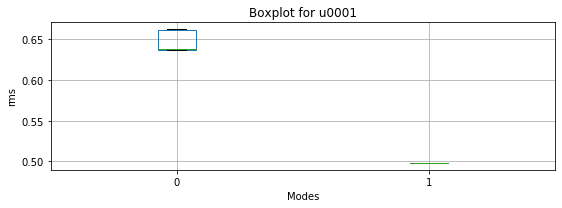

In [20]:
image_boxplot = plotting.modes_boxplot(df_u0001, "rms", SOURCE_IDS[0])

We create a list with all the sources dataframes for the "ModeId" feature and display the "RMS" boxplot across the different modes.

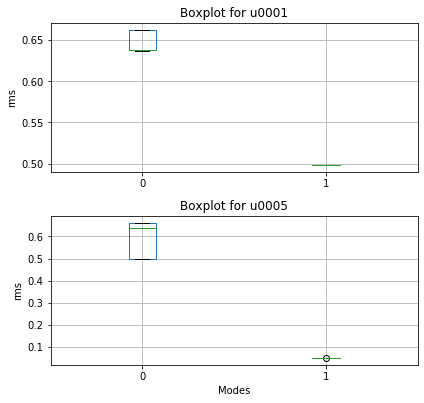

In [21]:
plotting.modes_group_boxplot([df_u0001, df_u0005], "rms", SOURCE_IDS)

We call the display over time of an individual source and identify all its operating modes.
We define the parameter "timeunit" given that the default unit in the function is milliseconds and the epochs in our data is seconds.

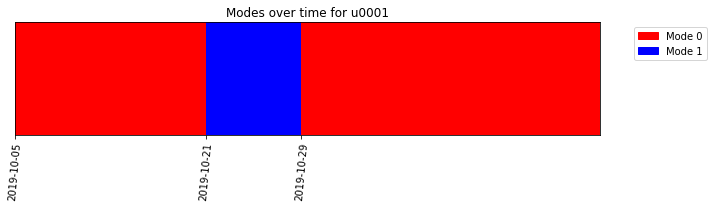

In [22]:
image_modes = plotting.modes_over_time(df_u0001, SOURCE_IDS[0], timeunit="s")

We create a list with all the sources dataframes and display the modes over time for all.

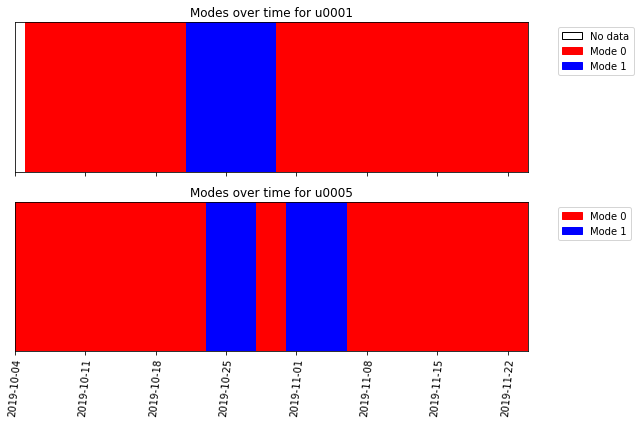

In [23]:
plotting.modes_over_time_group([df_u0001, df_u0005], SOURCE_IDS, timeunit="s")

## Population Analysis

Another feature is "BlackSheep", which targets a group of assets and aims to identify the atypical assets within a population.  

During our example, we will utilize all sources previously uploaded to our database.

In [31]:
SOURCE_ID_ALL = ["u0001", "u0002", "u0003", "u0004", "u0005", "u0006"]
SOURCE_ID_ALL

['u0001', 'u0002', 'u0003', 'u0004', 'u0005', 'u0006']

Similar to single asset feature, the requested population analysis will return a dictionary object with two elements.
The first element is a `"request_id"` that can be used to retrieve the results after.
The second element is `"request_status"` that provides the status right after placing the analysis request. 

Here, we will request the "BlackSheep" feature for all our sources.
In addition, we show how to pass additional parameters into the analysis request.
When we want to pass additional parameter request, this needs to be in the form of a dictionary.
In this particular analysis, we had relaxed the `"atypical_threshold"` parameter from the default value of 0.05 to 0.20 to discover a larger number of assets as atypical.

In [32]:
params = {"atypical_threshold": 0.1}
BS_ALL = session.request_population_analysis(SOURCE_ID_ALL, 'BlackSheep', parameters = params)
BS_ALL

{'request_id': '880ed4bfa182ab64f4b8d3d213a7800f', 'request_status': 'queued'}

Similarly, we can query for the status of our requested analysis, where the different status options remain the same.

In [33]:
REQUEST_ID_ALL = BS_ALL['request_id']
status = session.get_analysis_status(REQUEST_ID_ALL)
print(f"BlackSheep Analysis: {status}")

BlackSheep Analysis: successful


The next step is to retrieve the results by calling the "request_id".

The output of the `"get_analysis_results"` function is similar to single asset features,
which is a dictionary with two key elements, `"status"` and `"results"`.

In [34]:
blacksheep_table = session.get_analysis_results(request_id=REQUEST_ID_ALL)
blacksheep_table.keys()

dict_keys(['status', 'results'])

The `"results"` of the "BlackSheep" indicates the atypical assets.
We can see the list of atypical assets as the results output.

In [35]:
atypical = blacksheep_table["results"]
print(atypical)


{'atypical_assets': ['u0003', 'u0002']}
